In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score

In [14]:
df_1 = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_1.head(100)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,tcp,smtp,SF,3065,331,0,0,0,0,...,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
96,0,udp,other,SF,102,102,0,0,0,0,...,0.14,0.29,0.14,0.00,0.00,0.00,0.00,0.00,normal,21
97,0,tcp,http,SF,259,750,0,0,0,0,...,1.00,0.00,0.25,0.03,0.00,0.00,0.00,0.00,normal,21
98,1082,udp,other,SF,147,105,0,0,0,0,...,0.01,0.42,0.86,0.00,0.00,0.00,0.00,0.00,normal,21


In [15]:
df_2=pd.read_csv("Test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df_2.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [16]:
df=pd.concat([df_1,df_2],ignore_index="True")
df.shape

(148517, 43)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocoltype            148517 non-null  object 
 2   service                 148517 non-null  object 
 3   flag                    148517 non-null  object 
 4   srcbytes                148517 non-null  int64  
 5   dstbytes                148517 non-null  int64  
 6   land                    148517 non-null  int64  
 7   wrongfragment           148517 non-null  int64  
 8   urgent                  148517 non-null  int64  
 9   hot                     148517 non-null  int64  
 10  numfailedlogins         148517 non-null  int64  
 11  loggedin                148517 non-null  int64  
 12  numcompromised          148517 non-null  int64  
 13  rootshell               148517 non-null  int64  
 14  suattempted         

In [18]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [19]:
df.describe(include='O')

,protocoltype,service,flag,attack
count,148517,148517,148517,148517
unique,3,70,11,40
top,tcp,http,SF,normal
freq,121569,48191,89820,77054


In [20]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [21]:
df_new=df[['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
        'wrongfragment',  'hot',  'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 
        'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']].copy()

In [22]:
df_new.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate

In [23]:
df_new.query('service=="http"')

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.0,0.0,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
12,0,tcp,http,SF,287,2251,0,0,1,0,...,1.0,0.0,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
16,0,tcp,http,SF,300,13788,0,0,1,0,...,1.0,0.0,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
18,0,tcp,http,SF,233,616,0,0,1,0,...,1.0,0.0,0.02,0.03,0.00,0.00,0.02,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148505,0,tcp,http,SF,264,14839,0,0,1,0,...,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
148506,0,tcp,http,SF,274,1623,0,0,1,0,...,1.0,0.0,0.01,0.04,0.00,0.00,0.00,0.00,normal,21
148508,0,tcp,http,SF,280,6087,0,0,1,0,...,1.0,0.0,0.20,0.04,0.00,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,1,0,...,1.0,0.0,0.01,0.01,0.01,0.00,0.00,0.00,normal,21


In [24]:
df_new.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148512    False
148513    False
148514    False
148515     True
148516    False
Length: 148517, dtype: bool

'~' this type of design is used for the compliment

In [25]:
df_new.loc[~df_new.duplicated(subset='service')]

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11124,0,tcp,http_8001,S0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.13,1.00,0.87,0.00,satan,17
25718,0,tcp,aol,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.03,0.00,0.97,1.00,satan,17
45071,0,tcp,http_2784,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.10,0.00,0.88,1.00,satan,17
60799,0,udp,tftp_u,SF,1,0,0,0,0,0,...,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,normal,11


In [26]:
df_new.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
wrongfragment               int64
hot                         int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcount             int64
dsthostsamesrvrate        float64
dsthostdiffsrv

In [27]:
obj_col=df_new.select_dtypes(include="object").columns
print(obj_col)

Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')


In [28]:
df_newM=df_new.copy()

In [29]:
df_newM["attack"].loc[df_newM["attack"]!="normal"]="attack"

C:\Users\RISHU\AppData\Local\Temp\ipykernel_1172\1847045414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newM["attack"].loc[df_newM["attack"]!="normal"]="attack"


In [30]:
le=LabelEncoder()
for i in obj_col:
    df_newM[i]=le.fit_transform(df_newM[i])
df_newM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocoltype            148517 non-null  int32  
 2   service                 148517 non-null  int32  
 3   flag                    148517 non-null  int32  
 4   srcbytes                148517 non-null  int64  
 5   dstbytes                148517 non-null  int64  
 6   wrongfragment           148517 non-null  int64  
 7   hot                     148517 non-null  int64  
 8   loggedin                148517 non-null  int64  
 9   numcompromised          148517 non-null  int64  
 10  rootshell               148517 non-null  int64  
 11  suattempted             148517 non-null  int64  
 12  numroot                 148517 non-null  int64  
 13  numfilecreations        148517 non-null  int64  
 14  numshells           

<Axes: >

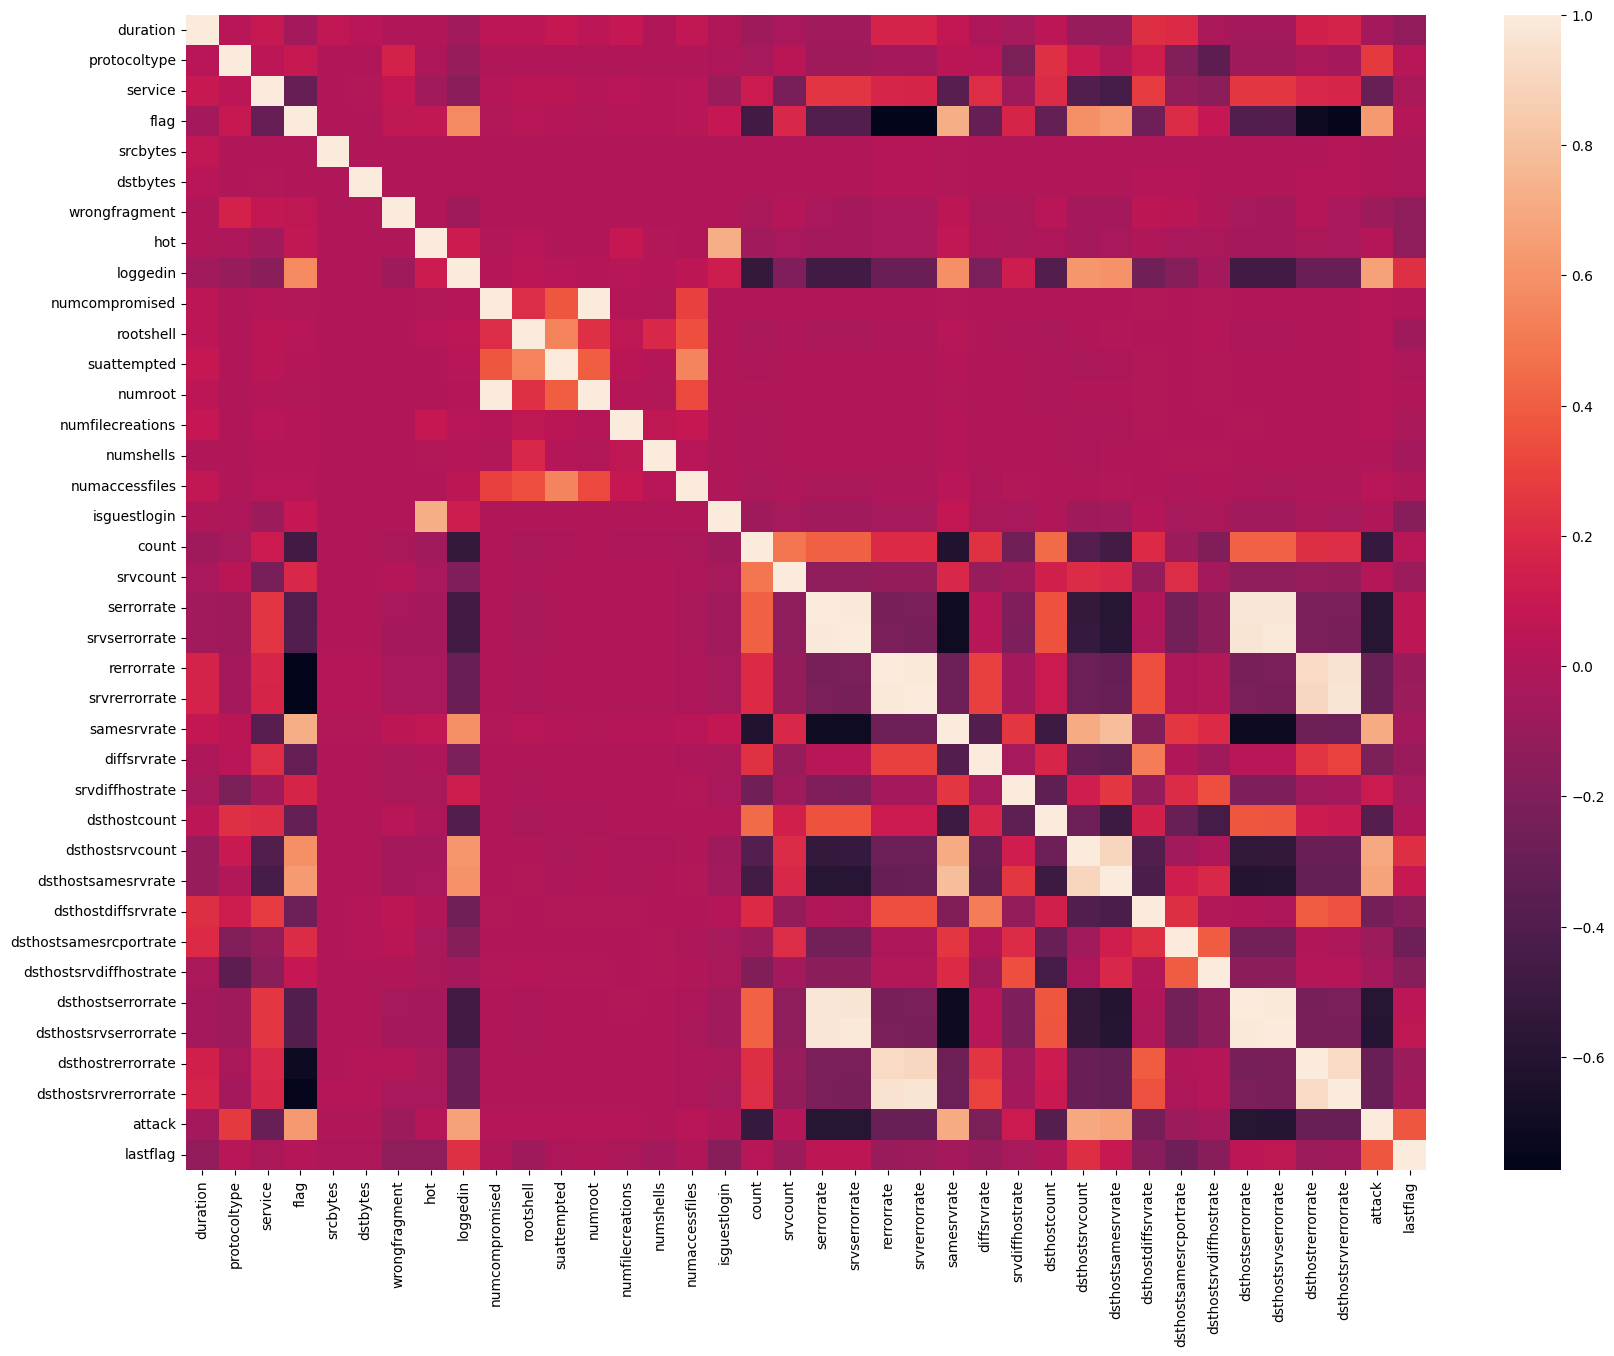

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df_newM.corr(),annot=False)

In [32]:
colum=df_newM.columns.tolist()
column=set()
corr=df_newM.corr()
for i in range(len(colum)-1):
    for j in range(i+1 , len(colum)):
        if corr[colum[i]][colum[j]]>0.9:
            print(colum[i],colum[j],corr[colum[i]][colum[j]])
            column.add(colum[i])

print(column)  


numcompromised numroot 0.9987247769091526
serrorrate srvserrorrate 0.9915070693808372
serrorrate dsthostserrorrate 0.9746962586935748
serrorrate dsthostsrvserrorrate 0.9760304550908055
srvserrorrate dsthostserrorrate 0.9708019602537421
srvserrorrate dsthostsrvserrorrate 0.9819824454731348
rerrorrate srvrerrorrate 0.9860951463945854
rerrorrate dsthostrerrorrate 0.9168894291969533
rerrorrate dsthostsrvrerrorrate 0.9573580783780464
srvrerrorrate dsthostrerrorrate 0.9063357988123594
srvrerrorrate dsthostsrvrerrorrate 0.9656063394958903
dsthostserrorrate dsthostsrvserrorrate 0.9828121495094096
dsthostrerrorrate dsthostsrvrerrorrate 0.9213497772478179
{'srvrerrorrate', 'rerrorrate', 'dsthostserrorrate', 'dsthostrerrorrate', 'numcompromised', 'serrorrate', 'srvserrorrate'}


In [33]:
column=list(column)
print(column)
df_newMm=df_newM.drop(column,axis=1)
df_newMm.columns


['srvrerrorrate', 'rerrorrate', 'dsthostserrorrate', 'dsthostrerrorrate', 'numcompromised', 'serrorrate', 'srvserrorrate']


Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'wrongfragment', 'hot', 'loggedin', 'rootshell', 'suattempted',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate',
       'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [34]:
x=df_newMm.drop(["attack"],axis=1)
y=df_newMm["attack"]

In [35]:
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
print(x_transformed)

[[-0.11248106 -0.13201733 -0.71982887 ... -0.58481269 -0.40681468
   0.2633527 ]
 [-0.11248106  2.23595585  0.7533375  ... -0.58481269 -0.40681468
  -1.5616325 ]
 [-0.11248106 -0.13201733  1.06024716 ...  1.74229525 -0.40681468
  -0.10164434]
 ...
 [-0.11248106 -0.13201733 -0.47430114 ... -0.58481269 -0.19803471
  -1.5616325 ]
 [-0.11248106  2.23595585 -1.21088432 ... -0.58481269 -0.40681468
   0.62834974]
 [-0.11248106 -0.13201733  1.55130262 ... -0.58481269  2.57575633
  -1.92662953]]


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)

(103961, 30)
(44556, 30)


In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)

C:\Users\RISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print(acc_score)
print(recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
print(precision_score(y_pred,y_test))

0.9651449860849268
0.9690887718228918
0.966291159297606
0.9635096528439097
